## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [87]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

In [3]:
print(train)

[[ 2.         -0.72221141  2.00447087]
 [ 2.         -0.92467912  0.48366928]
 [ 2.         -0.76602281  0.79432891]
 [ 2.         -0.07328948  0.96992915]
 [ 1.         -1.39291198  0.99969709]
 [ 2.         -0.20223339  1.35033191]
 [ 2.          0.48173767  0.98441858]
 [ 1.         -1.86551212  1.54773159]
 [ 2.         -0.15246873  0.92248969]
 [ 2.          0.38635649  0.36633672]
 [ 2.          0.08757643  0.93241153]
 [ 2.         -0.1628708   0.63051719]
 [ 2.          0.2056276   0.90272806]
 [ 2.         -0.67888033  0.51928249]
 [ 1.         -0.63130944  1.66060671]
 [ 2.          0.45135715  1.02281328]
 [ 2.         -0.37944706  0.89250289]
 [ 2.         -0.67808925  0.96943362]
 [ 2.         -0.63536795  1.29934919]
 [ 2.         -0.39450331  0.32716323]
 [ 2.          0.36146294  1.25890894]
 [ 2.         -0.52866328  1.26110462]
 [ 2.         -0.25105104  0.30418194]
 [ 2.          0.07828845  1.44882862]
 [ 2.         -0.50858876  1.28756657]
 [ 2.          0.40886938

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [ ]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

In [ ]:
# For graphical representation  use code below for instance :
class_L = ...
plt.imshow(class_L, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)) )
plt.show()

In [4]:
np.random.shuffle(train)
x_train = train[:, -2:]
x_test = test[:, -2:]
y_train = train[:, 0]
y_test = test[:, 0]

mean1, mean2 = np.mean(x_train, axis=0)
print(mean1, mean2)

-0.23799353652041355 1.2075534320282642


Afin de pouvoir visualiser mes données avec Seaborn nous allons plutot utiliser pandas que numpy.

In [5]:
columns = ['X', 'Y', 'target']
print( x_train.shape, y_train.shape)
x_train_df = pd.DataFrame(np.concatenate((x_train, y_train[:, newaxis]), axis = 1), columns = columns)

print(x_train_df.shape)

(100, 2) (100,)
(100, 3)


<AxesSubplot:xlabel='X', ylabel='Y'>

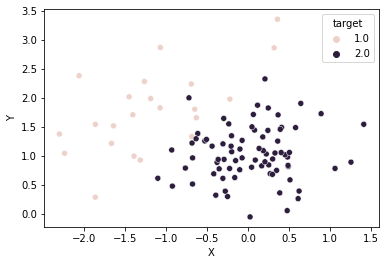

In [6]:
sns.scatterplot(x = 'X', y = 'Y', hue = x_train_df['target'], data = x_train_df)

In [ ]:
N = x_train.shape[0]
#Pi
N1 = np.count_nonzero(y_train == 1)
N2 = N-N1 
#pi_1, pi_2 = N1 / N , N2 / N 

In [ ]:
# Mean 
x_mean_1, x_mean_2, y_mean_1, y_mean_2 = x_train_df[x_train_df['target'] == 1].sum()[0] / N1, x_train_df[x_train_df['target'] == 2].sum()[0] / N2 , x_train_df[x_train_df['target'] == 1].sum()[1] / N1, x_train_df[x_train_df['target'] == 2].sum()[1] / N2

print(f"X_mean_1 : {x_mean_1},\nx_mean_2 : {x_mean_2},\ny_mean_1 : {y_mean_1},\ny_mean_2 : {y_mean_2}")

mu_1  = np.array([[x_mean_1], [y_mean_1]]).T
mu_2  = np.array([[x_mean_2], [y_mean_2]]).T

In [52]:
# cov bis matrice de dispersion intra classe
cov_1, cov_2  = np.cov(x_train_df[x_train_df['target'] == 1].iloc[:, :2] , rowvar=False)/ N1, np.cov(x_train_df[x_train_df['target'] == 2].iloc[:, :2], rowvar=False)/N2
covbis = cov_1 + cov_2

print(cov_1.shape, cov_2.shape)
print(cov_1, cov_2)

# Cov matrix

sigma = np.cov(x_train_df.iloc[:, :2], rowvar=False)


X_mean_1 : -1.1835069308058639,
x_mean_2 : 0.028689728534456782,
y_mean_1 : 1.786554365666049,
y_mean_2 : 1.0442454763868376
(2, 2) (2, 2)
[[0.02460221 0.0146629 ]
 [0.0146629  0.02322189]] [[0.00315373 0.00025143]
 [0.00025143 0.00271216]]


In [58]:
#compute reverse sigma
sigma_rev = np.linalg.inv(covbis)
print(f"sigma = {sigma} \nsigma_rev = {sigma_rev} \n, shape {sigma.shape}, shape_rev{sigma_rev.shape}")
print(sigma, cov)


sigma = [[ 0.56083636 -0.07228938]
 [-0.07228938  0.36841732]] 
sigma_rev = [[ 52.14059736 -29.9853607 ]
 [-29.9853607   55.80352307]] 
, shape (2, 2), shape_rev(2, 2)
[[ 0.56083636 -0.07228938]
 [-0.07228938  0.36841732]] [[0.54124863 0.24599115]
 [0.51088153 0.21154879]]


Les valeurs semblent être cohérente à ce que l'on observe à l'oeil nu sur les nuages de points affichés au-dessus.

In [61]:
def H(x, w, b):
    return -(w[0,0]/w[1,0])* X_line - (b[0] / w[1,0])

In [67]:
X_line = np.linspace(-2.5, 1.5, 100)


w = sigma_rev @ (mu_1- mu_2).T
b = np.log(N1/N2) - 0.5*(mu_1 @ sigma_rev @ mu_1.T - mu_2 @ sigma_rev @ mu_2.T)
H = -(w[0,0]/w[1,0])* X_line - (b[0] / w[1,0])


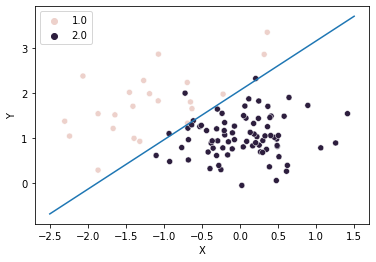

In [68]:
sns.scatterplot(x = 'X', y = 'Y', hue = x_train_df['target'], data = x_train_df)
sns.lineplot(x= X_line, y= H)
plt.show()

In [94]:
# Train
H_train = -(w[0,0]/w[1,0])* x_train[:, 0] - (b[0] / w[1,0])
diff = H_train - x_train[:, 1]
y_pred = np.array([1 if d > 0 else 0 for d in diff])



print(y_pred.shape)
C1 = y_pred.sum()
C2 = N - C1
print(f"C1 = {C1},\nC2 = {C2}")
target = y_train
print(target.shape)
C1_t = (target-1).sum()
C2_t = N - C1_t
print(f"C1_t = {C1_t},\nC2_t = {C2_t}")

(100,)
C1 = 75,
C2 = 25
(100,)
C1_t = 78.0,
C2_t = 22.0


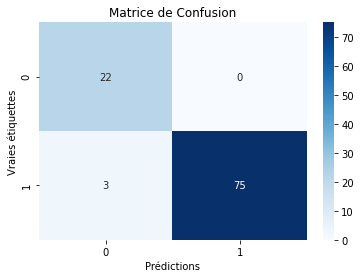

In [93]:
# Confusion matrix train
confusion = confusion_matrix(target, y_pred+1)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [100]:
# Test
N_test = x_test.shape[0]

H_test = -(w[0,0]/w[1,0])* x_test[:, 0] - (b[0] / w[1,0])
diff = H_test - x_test[:, 1]

y_pred_test = np.array([1 if d > 0 else 0 for d in diff])


print(y_pred_test.shape)
C1_test = y_pred_test.sum()
C2_test = N_test - C1
print(f"C1 = {C1},\nC2 = {C2}")

target_test = y_test
print(target.shape)
C1_target_test = (target_test-1).sum()
C2_target_test = N_test - C1_target_test
print(f"C1_t = {C1_target_test},\nC2_t = {C2_target_test}")

(200,)
C1 = 138,
C2 = 62
(200,)
C1_t = 138.0,
C2_t = 62.0


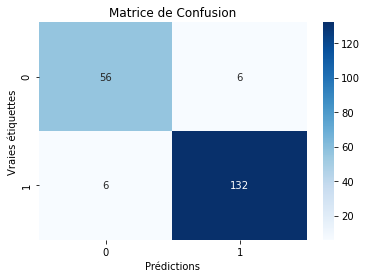

In [101]:
# Confusion matrix train
confusion = confusion_matrix(target_test, y_pred_test+1)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [105]:
columns = ['X', 'Y', 'target']
print(x_test.shape, y_test.shape)
test_df = pd.DataFrame(np.concatenate((x_test, y_test[:, newaxis]), axis = 1), columns = columns)

(200, 2) (200,)


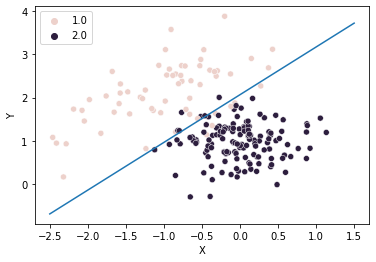

In [106]:
sns.scatterplot(x = 'X', y = 'Y', hue = test_df['target'], data = test_df)
sns.lineplot(x= X_line, y= H)
plt.show()

In [ ]:
def LDA()

mu1 = [[-1.18350693  1.78655437]], mu1.shape (1, 2)
-1.6320321469848649
w = [[ 1.95104694]
 [-1.63203215]], w.shape (2, 1)
b = [[4.70219583]], b.shape (1, 1)


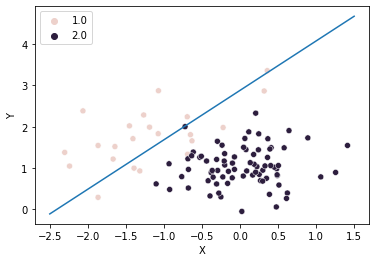

In [43]:
X_line = np.linspace(-2.5, 1.5, 100)

print(f"mu1 = {mu_1}, mu1.shape {mu_1.shape}")
print(w[1,0])

w = sigma_rev @ (mu_2- mu_1).T
b = np.log(N2/N1) - 0.5*(mu_2 @ sigma_rev @ mu_2.T - mu_1 @ sigma_rev @ mu_1.T)
H = -(w[0,0]/w[1,0])* X_line - (b[0] / w[1,0])


print(f"w = {w}, w.shape {w.shape}")
print(f"b = {b}, b.shape {b.shape}")
sns.scatterplot(x = 'X', y = 'Y', hue = x_train_df['target'], data = x_train_df)
sns.lineplot(x= X_line, y= H)
plt.show()

QDA

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...


